In [1]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 26.5 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(35000, 32, 32, 3)

In [4]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [5]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [ ]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

In [ ]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [ ]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer:
Batch Normalization is a technique commonly used in deep learning models to normalize the activations of each layer across a batch of training samples,
ensuring a more stable and efficient learning process. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch.
This has the effect of stabilizing the learning process and greatly reducing the number of training epochs required to train deep networks.
Hence, it is capable of producing desired outputs by reducing the number of epochs, thereby making the process more efficient, and less complex and time-consuming.

Need for Batch Normalization:
Let us first understand the term "Internal Covariate Shift"-
Training deep neural networks with many layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm.
The distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated.
This can cause the learning algorithm to forever chase a moving target.
This change in the distribution of inputs to layers in the network is called "Internal covariate shift."
One challenge during training deep neural networks is that the model is updated layer-by-layer backward from the output to the input using an estimate of error that assumes the weights in the layers prior to the current layer are fixed.
For example, the weights of a layer are updated given an expectation that the prior layer outputs values with a given distribution.
This distribution is likely changed after the weights of the prior layer are updated.
Hence, because all layers are changed during an update, the update procedure is forever chasing a moving target.
The distribution of each layer's inputs changes during training, as the parameters of the previous layers change.
This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it hard to train models.
This is why Batch normalization is needed.
It accelerates training, in some cases by halving the epochs or better, and provides some regularization, reducing generalization error,
and also standardizes the inputs to a network, applied to ether the activations of a prior layer or inputs directly.

How does it solve the problem of Internal Covariate shift?
Batch normalization helps coordinate the update of multiple layers in the model.
It does this by scaling the output of the layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer.
(Standardization refers to rescaling data to have a mean of zero and a standard deviation of one, e.g. a standard Gaussian.)
This process is also called "whitening" when applied to images in computer vision.
Standardizing the activations of the prior layer means that assumptions the subsequent layer makes about the spread and distribution of inputs during the weight update will not change significantly.
This has the effect of stabilizing and speeding-up the training process of deep neural networks.
Normalizing the inputs to the layer reduces the number of epochs required.
It can also have a regularizing effect, reducing generalization error much like the use of activation regularization.
Apart from solving the problem mentioned above, it also smooths and, in turn, simplifies the optimization function that is being solved when training the network.
Hence, batch normalization improves training speed, increases stability (by not changing inputs during the weight updates drastically), smoothens optimization,
and enables higher learning rates.

Sources: https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Batch%20normalization%20is%20a%20technique%20to%20standardize%20the%20inputs%20to,some%20regularization%2C%20reducing%20generalization%20error.


"""

In [ ]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

In [ ]:
# model initialization
model1 = tf.keras.Sequential()

# Intermediate layers
#model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(12, (3,3), activation = 'relu', input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.MaxPooling2D((3,3)))
model1.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(128, activation='relu'))

# final layer
model1.add(tf.keras.layers.Dense(10, activation='tanh'))

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 12)        336       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 16)        1744      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 9, 9, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 conv2d_25 (Conv2D)          (None, 5, 5, 32)          4640      
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)          9248      
                                                      

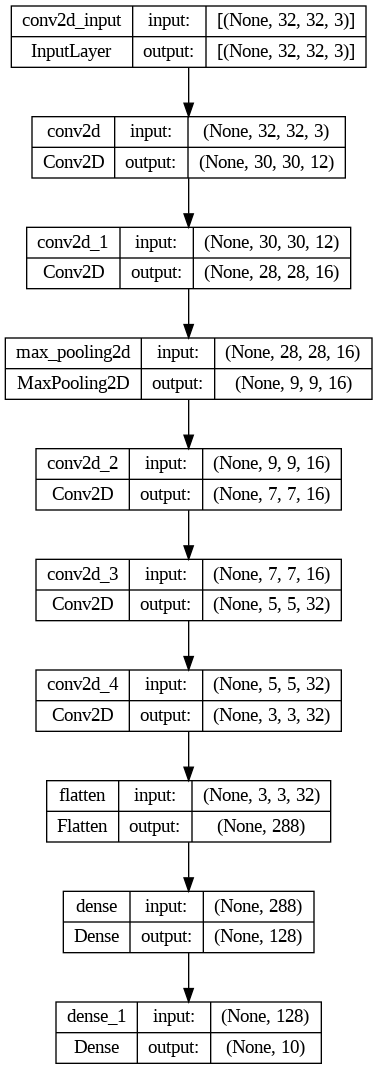

In [ ]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

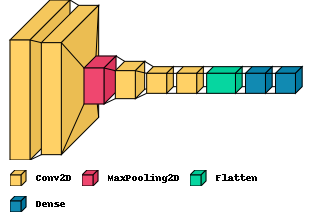

In [ ]:
# just run this cell as it is
visualkeras.layered_view(model1, legend=True)

In [ ]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model1.fit(augmented_images, epochs=10,validation_data = validation_data)

 619/1094 [===============>..............] - ETA: 22s - loss: 2.1357 - accuracy: 0.0454

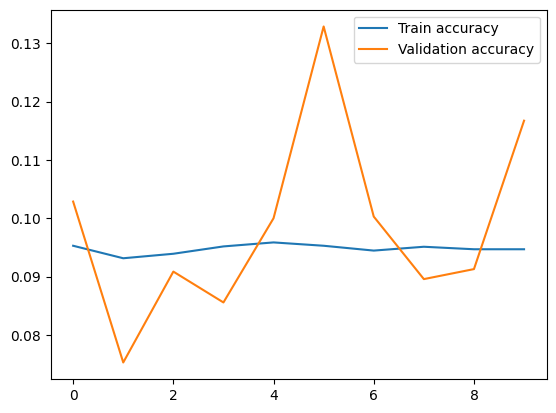

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model1.evaluate(X_test,Y_test)

469/469 [==============================] - 5s 11ms/step - loss: 1.3236 - accuracy: 0.0939


[1.3235516548156738, 0.0939333364367485]

In [ ]:
#It is very clear that our model is very bad for the following reasons:
#1. Train accuracy seems to remain constantly low over increasing no. of epochs.
#2. Validation accuracy shows ups and downs instead of following a common increasing trend.
#3. Accuracies are very low.

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [ ]:
#model2
model2 = tf.keras.Sequential()

# Intermediate layers
model2.add(tf.keras.layers.Conv2D(12, (3,3), activation = 'relu', input_shape=(32,32,3)))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D((3,3)))
model2.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D((3,3)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))          #changed 128 to 64 here

# final layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 12)        336       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        1744      
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 32)          9248      
                                                      

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),  #keeping the lr low because even after such low lr, we were getting very low accuracy previously
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model2.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 76s 68ms/step - loss: 2.0909 - accuracy: 0.1745 - val_loss: 1.9494 - val_accuracy: 0.0666
Epoch 2/10
1094/1094 [==============================] - 66s 61ms/step - loss: 1.9116 - accuracy: 0.1209 - val_loss: 1.8605 - val_accuracy: 0.1473
Epoch 3/10
1094/1094 [==============================] - 67s 61ms/step - loss: 1.8574 - accuracy: 0.0983 - val_loss: 1.8302 - val_accuracy: 0.0499
Epoch 4/10
1094/1094 [==============================] - 73s 66ms/step - loss: 1.8202 - accuracy: 0.0934 - val_loss: 1.7853 - val_accuracy: 0.0930
Epoch 5/10
1094/1094 [==============================] - 83s 76ms/step - loss: 1.7876 - accuracy: 0.0908 - val_loss: 1.7668 - val_accuracy: 0.0950
Epoch 6/10
1094/1094 [==============================] - 68s 62ms/step - loss: 1.7531 - accuracy: 0.0927 - val_loss: 1.7353 - val_accuracy: 0.1227
Epoch 7/10
1094/1094 [==============================] - 68s 62ms/step - loss: 1.7275 - accuracy: 0.0917 - val_loss: 1.6994 - val_accura

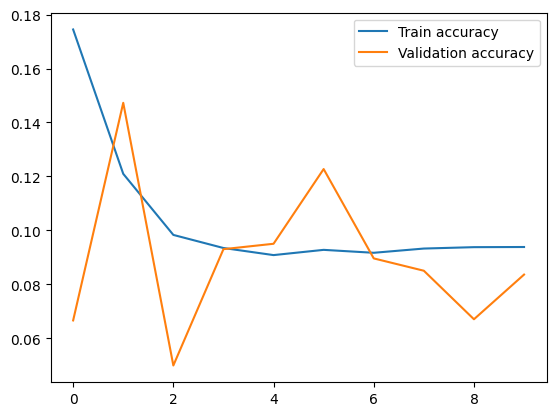

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
#This is an even worse model since training accuracy decreases- clear case of underfitting

In [ ]:
#model3--changing the number of layers & the size of kernels
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 1, 64)          102464    
                                                                 
 flatten_2 (Flatten)         (None, 64)               

In [ ]:
history = model3.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 79s 71ms/step - loss: 1.9550 - accuracy: 0.1284 - val_loss: 1.7787 - val_accuracy: 0.2179
Epoch 2/10
1094/1094 [==============================] - 79s 72ms/step - loss: 1.6946 - accuracy: 0.1039 - val_loss: 1.6308 - val_accuracy: 0.1459
Epoch 3/10
1094/1094 [==============================] - 72s 66ms/step - loss: 1.6123 - accuracy: 0.1032 - val_loss: 1.5661 - val_accuracy: 0.1007
Epoch 4/10
1094/1094 [==============================] - 73s 67ms/step - loss: 1.5594 - accuracy: 0.1026 - val_loss: 1.5272 - val_accuracy: 0.0996
Epoch 5/10
1094/1094 [==============================] - 78s 71ms/step - loss: 1.5209 - accuracy: 0.1021 - val_loss: 1.4979 - val_accuracy: 0.0601
Epoch 6/10
1094/1094 [==============================] - 91s 83ms/step - loss: 1.4844 - accuracy: 0.0971 - val_loss: 1.4777 - val_accuracy: 0.1186
Epoch 7/10
1094/1094 [==============================] - 76s 70ms/step - loss: 1.4546 - accuracy: 0.0980 - val_loss: 1.4304 - val_accura

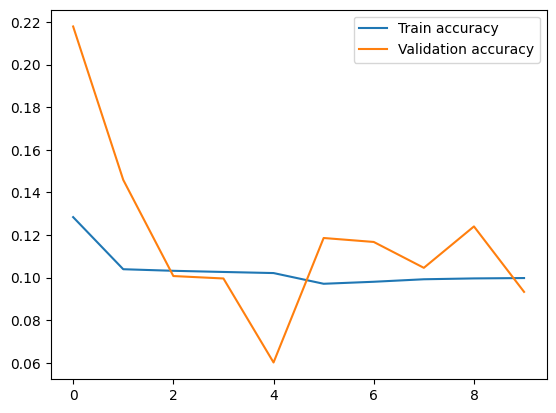

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
#model4---using dropout
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))
model4.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))
model4.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(128, activation='relu'))

# final layer
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 64)          102464    
                                                                 
 flatten_3 (Flatten)         (None, 64)               

In [ ]:
history = model4.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 72s 66ms/step - loss: 2.0610 - accuracy: 0.1473 - val_loss: 1.8181 - val_accuracy: 0.1021
Epoch 2/10
1094/1094 [==============================] - 71s 65ms/step - loss: 1.8399 - accuracy: 0.1121 - val_loss: 1.7178 - val_accuracy: 0.0937
Epoch 3/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.7488 - accuracy: 0.1086 - val_loss: 1.6152 - val_accuracy: 0.0826
Epoch 4/10
1094/1094 [==============================] - 70s 64ms/step - loss: 1.6999 - accuracy: 0.1036 - val_loss: 1.5964 - val_accuracy: 0.0570
Epoch 5/10
1094/1094 [==============================] - 75s 69ms/step - loss: 1.6642 - accuracy: 0.0989 - val_loss: 1.5634 - val_accuracy: 0.0931
Epoch 6/10
1094/1094 [==============================] - 69s 63ms/step - loss: 1.6294 - accuracy: 0.1005 - val_loss: 1.5464 - val_accuracy: 0.0900
Epoch 7/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.5981 - accuracy: 0.0965 - val_loss: 1.4830 -

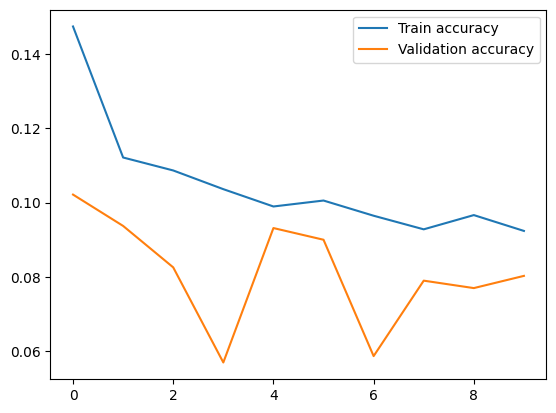

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
#this is not a good model either- there is overfitting as well because there is a gap between the two plots

In [ ]:
#model5--reducing the number of layers at each step & adding one more dropout layer
model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))

# final layer
model5.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [ ]:
history = model5.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 42s 37ms/step - loss: 2.1286 - accuracy: 0.1382 - val_loss: 1.9058 - val_accuracy: 0.1231
Epoch 2/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.9355 - accuracy: 0.1077 - val_loss: 1.7975 - val_accuracy: 0.0740
Epoch 3/10
1094/1094 [==============================] - 41s 37ms/step - loss: 1.8531 - accuracy: 0.1048 - val_loss: 1.7319 - val_accuracy: 0.0929
Epoch 4/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.7848 - accuracy: 0.1039 - val_loss: 1.6712 - val_accuracy: 0.1156
Epoch 5/10
1094/1094 [==============================] - 41s 38ms/step - loss: 1.7391 - accuracy: 0.1070 - val_loss: 1.6181 - val_accuracy: 0.1066
Epoch 6/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.7012 - accuracy: 0.1079 - val_loss: 1.5783 - val_accuracy: 0.0844
Epoch 7/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.6781 - accuracy: 0.1004 - val_loss: 1.5512 -

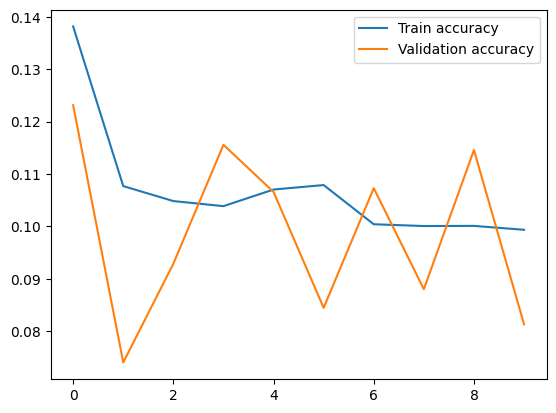

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
#using SGD as optimizer

In [13]:
#model 6--using average pooling adn SGD (instead of Adam)
model6 = tf.keras.Sequential()

model6.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model6.add(tf.keras.layers.AveragePooling2D((2, 2)))
model6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(64, activation='relu'))
model6.add(tf.keras.layers.Dropout(0.5))

# final layer
model6.add(tf.keras.layers.Dense(10, activation='softmax'))

In [14]:
model6.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [15]:
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 average_pooling2d (AverageP  (None, 6, 6, 32)         0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
history = model6.fit(augmented_images, epochs=2,validation_data = validation_data)

Epoch 1/2
1094/1094 [==============================] - 35s 30ms/step - loss: 2.3055 - accuracy: 0.0817 - val_loss: 2.3025 - val_accuracy: 0.0013
Epoch 2/2
1094/1094 [==============================] - 27s 25ms/step - loss: 2.3059 - accuracy: 0.0812 - val_loss: 2.3019 - val_accuracy: 0.0014


In [ ]:
#So far, model 1 works the best (though it still has low accuracy)

In [6]:
#finally, coming to my last model (model 7), I see that funnelling up does not give a good accuracy, therefore in my final attempt, I'll try to funnel down(reduce the number of layers at each step)
model7 = tf.keras.Sequential()

model7.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model7.add(tf.keras.layers.MaxPooling2D((2, 2)))
model7.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D((2, 2)))
model7.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model7.add(tf.keras.layers.Flatten())
model7.add(tf.keras.layers.Dropout(0.5))
model7.add(tf.keras.layers.Dense(16, activation='relu'))
model7.add(tf.keras.layers.Dropout(0.5))

# final layer
model7.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [9]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 512)               0

In [11]:
history = model7.fit(augmented_images, epochs=7,validation_data = validation_data)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 41s 27ms/step - loss: 2.2815 - accuracy: 0.0539 - val_loss: 2.1768 - val_accuracy: 0.0834
Epoch 2/7
1094/1094 [==============================] - 30s 28ms/step - loss: 2.1524 - accuracy: 0.1003 - val_loss: 1.9935 - val_accuracy: 0.1406
Epoch 3/7
1094/1094 [==============================] - 30s 27ms/step - loss: 2.0531 - accuracy: 0.0856 - val_loss: 1.9133 - val_accuracy: 0.0880
Epoch 4/7
1094/1094 [==============================] - 29s 27ms/step - loss: 1.9917 - accuracy: 0.0734 - val_loss: 1.8511 - val_accuracy: 0.0873
Epoch 5/7
1094/1094 [==============================] - 30s 27ms/step - loss: 1.9523 - accuracy: 0.0731 - val_loss: 1.8107 - val_accuracy: 0.0609
Epoch 6/7
1094/1094 [==============================] - 30s 27ms/step - loss: 1.9166 - accuracy: 0.0747 - val_loss: 1.7745 - val_accuracy: 0.0870
Epoch 7/7
1094/1094 [==============================] - 29s 26ms/step - loss: 1.8831 - accuracy: 0.0805 - val_loss: 1.7413 - val_accuracy: 0.